In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

# Constants
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a function to create dense neural networks with varying hidden layers
def create_dense_model(num_hidden_layers):
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    for _ in range(num_hidden_layers):
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

170498071/170498071 [==============================] - 12s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# List to store model names for the legend
model_names = ["CNN"] + [f"Dense {i} Layers" for i in range(5)]

# Train and evaluate the models
validation_accuracies = []

# Train the CNN model and get its validation accuracy
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
    validation_accuracies.append(history.history['val_accuracy'])
else:
    print('Using real-time data augmentation.')

    # Data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0,
        zoom_range=0,
        channel_shift_range=0,
        fill_mode='nearest',
        cval=0,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    # Compute quantities required for feature-wise normalization
    datagen.fit(x_train)

    # Fit the model with data augmentation
    history = model.fit_generator(
        datagen.flow(x_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(x_test, y_test),
        workers=4
    )
    validation_accuracies.append(history.history['val_accuracy'])

Using real-time data augmentation.


<ipython-input-7-2fb69147b2c1>:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
98/98 [==============================] - 35s 254ms/step - loss: 2.1289 - accuracy: 0.2097 - val_loss: 1.9477 - val_accuracy: 0.3158
Epoch 2/10
98/98 [==============================] - 28s 269ms/step - loss: 1.9240 - accuracy: 0.3023 - val_loss: 1.7926 - val_accuracy: 0.3654
Epoch 3/10
98/98 [==============================] - 27s 267ms/step - loss: 1.8065 - accuracy: 0.3425 - val_loss: 1.6764 - val_accuracy: 0.4013
Epoch 4/10
98/98 [==============================] - 27s 265ms/step - loss: 1.7336 - accuracy: 0.3704 - val_loss: 1.6035 - val_accuracy: 0.4182
Epoch 5/10
98/98 [==============================] - 27s 268ms/step - loss: 1.6805 - accuracy: 0.3885 - val_loss: 1.5415 - val_accuracy: 0.4368
Epoch 6/10
98/98 [==============================] - 28s 274ms/step - loss: 1.6343 - accuracy: 0.4069 - val_loss: 1.5234 - val_accuracy: 0.4536
Epoch 7/10
98/98 [==============================] - 27s 270ms/step - loss: 1.6032 - accuracy: 0.4153 - val_loss: 1.4835 - val_accuracy: 0.4601

In [ ]:
# Train dense models with varying numbers of hidden layers
for num_hidden_layers in range(5):
    dense_model = create_dense_model(num_hidden_layers)
    dense_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    if not data_augmentation:
        history = dense_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
        validation_accuracies.append(history.history['val_accuracy'])
    else:
        # Data augmentation for dense models
        datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            zca_epsilon=1e-06,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0,
            zoom_range=0,
            channel_shift_range=0,
            fill_mode='nearest',
            cval=0,
            horizontal_flip=True,
            vertical_flip=False,
            rescale=None,
            preprocessing_function=None,
            data_format=None,
            validation_split=0.0
        )
        datagen.fit(x_train)

        # Fit the dense model with data augmentation
        history = dense_model.fit_generator(
            datagen.flow(x_train, y_train, batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4
        )
        validation_accuracies.append(history.history['val_accuracy'])

<ipython-input-8-f5d3b80c6ec4>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = dense_model.fit_generator(


Epoch 1/10
98/98 [==============================] - 28s 275ms/step - loss: 2.1575 - accuracy: 0.2158 - val_loss: 2.0392 - val_accuracy: 0.2727
Epoch 2/10
98/98 [==============================] - 27s 272ms/step - loss: 2.0138 - accuracy: 0.2849 - val_loss: 1.9646 - val_accuracy: 0.3081
Epoch 3/10
98/98 [==============================] - 27s 269ms/step - loss: 1.9670 - accuracy: 0.3057 - val_loss: 1.9230 - val_accuracy: 0.3218
Epoch 4/10
98/98 [==============================] - 27s 266ms/step - loss: 1.9403 - accuracy: 0.3144 - val_loss: 1.8936 - val_accuracy: 0.3441
Epoch 5/10
98/98 [==============================] - 27s 270ms/step - loss: 1.9211 - accuracy: 0.3256 - val_loss: 1.8773 - val_accuracy: 0.3419
Epoch 6/10
98/98 [==============================] - 28s 272ms/step - loss: 1.9102 - accuracy: 0.3298 - val_loss: 1.8653 - val_accuracy: 0.3499
Epoch 7/10
98/98 [==============================] - 27s 268ms/step - loss: 1.8983 - accuracy: 0.3355 - val_loss: 1.8523 - val_accuracy: 0.3525

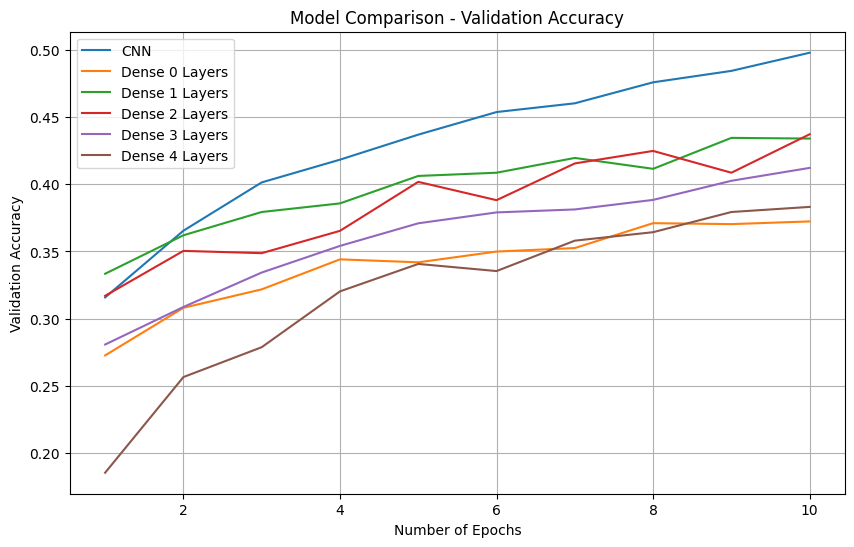

In [ ]:
# Plot the validation accuracies
plt.figure(figsize=(10, 6))
for i, accuracy in enumerate(validation_accuracies):
    plt.plot(range(1, epochs + 1), accuracy, label=model_names[i])

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison - Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()